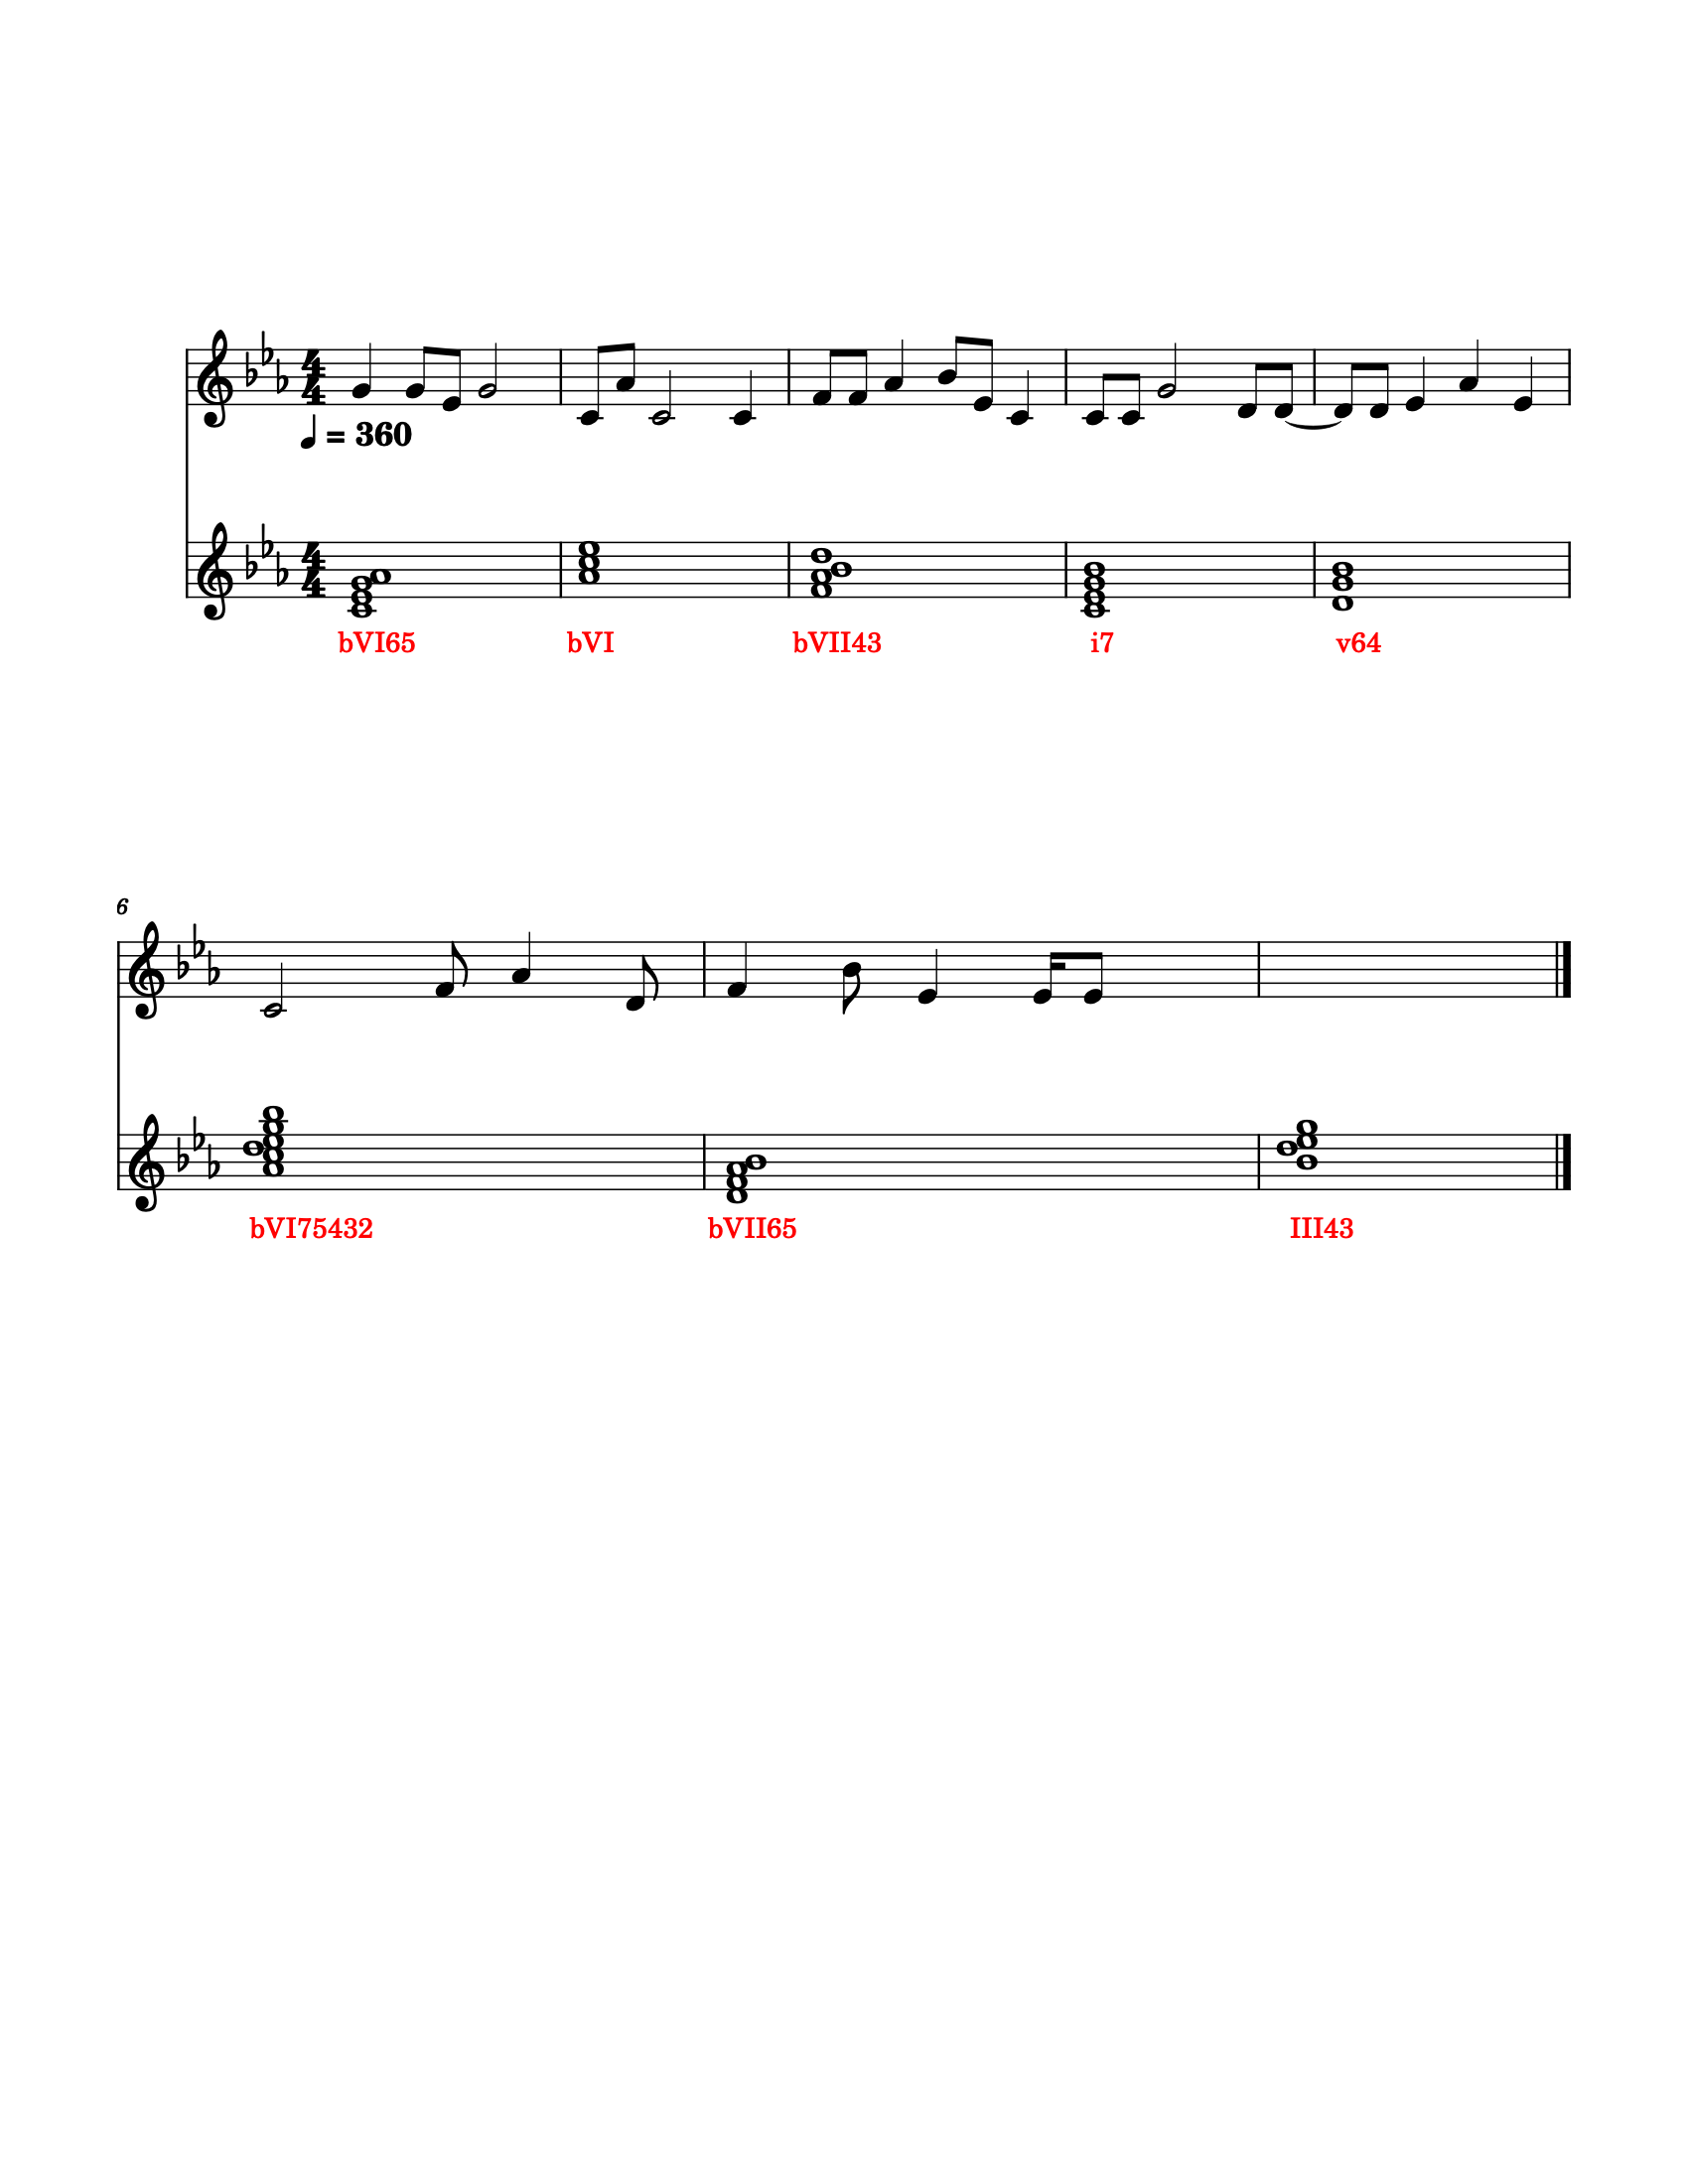

In [10]:
import random
from music21 import stream, note, meter, key, tempo, roman

def generate_random_melody_with_chords(length=32, key_signature='c', time_signature='4/4', tempo_mark=360):
    # Create a stream for the melody and chords
    score = stream.Score()

    # Melody part
    melody_part = stream.Part()
    score.append(melody_part)

    # Chords part
    chords_part = stream.Part()
    score.append(chords_part)

    # Set the key and time signature
    key_obj = key.Key(key_signature)
    melody_part.append(key_obj)
    melody_part.append(meter.TimeSignature(time_signature))
    chords_part.append(key_obj)
    chords_part.append(meter.TimeSignature(time_signature))

    # Set the tempo
    melody_part.append(tempo.MetronomeMark(number=tempo_mark))
    chords_part.append(tempo.MetronomeMark(number=tempo_mark))

    # Define diatonic scale degrees
    diatonic_degrees = [1, 2, 3, 4, 5, 6, 7]
    mchords = [
    'i', 'i6', 'i64',
    'ii°', 'iiø43', 'iiø65',
    'III', 'III64',
    'iv', 'iv6', 'iv64',
    'v', 'v6', 'v64',
    'VI', 'VI6', 'VI64',
    'VII', 'VII6', 'VII64'
]
    mChordsExt = [
    'i', 'i6', 'i64', 'i7', 'i65', 'i43', 'i9', 'i11',
    'ii°', 'iiø43', 'iiø65', 'iiø7', 'iiø753', 'iiø975', 'ii9', 'ii11',
    'III', 'III64', 'III7', 'III65', 'III43', 'III9', 'III11',
    'iv', 'iv6', 'iv64', 'iv7', 'iv65', 'iv43', 'iv9', 'iv11',
    'v', 'v6', 'v64', 'v7', 'v65', 'v43', 'v9', 'v11',
    'VI', 'VI6', 'VI64', 'VI7', 'VI65', 'VI43', 'VI9', 'VI11',
    'VII', 'VII6', 'VII64', 'VII7', 'VII65', 'VII43', 'VII9', 'VII11'
]

    # Choose the initial chord (I or IV)
    initial_chord_roman = random.choice(mChordsExt)
    cLength = length/8
    current_chord = roman.RomanNumeral(initial_chord_roman, key_obj,quarterLength=cLength)

    # Generate a random melody and chords using predefined motives
    for bar in range(length // 4):
        # Generate chords for the current bar
        chords_part.append(current_chord)
        lyric = note.Lyric(roman.romanNumeralFromChord(current_chord, key_obj).figure)
        lyric.style.color = 'red'
        current_chord.lyrics.append(lyric)



        # Generate melody notes for the current bar based on the selected chord
        for _ in range(4):
            
            # Generate a random note within the current chord for the melody
            degree = random.choice(diatonic_degrees)
            chord_pitches = current_chord.pitches[:-1]  # Exclude the octave
            pitch_class = random.choice(chord_pitches).name

            # Choose note duration based on on-beat/off-beat position
            if random.random() < 0.6:
                duration = random.choice([0.5, 1.0])  # On-beat
            else:
                duration = random.choice([0.25, 0.5, 2.0])  # Off-beat

            note_obj = note.Note(pitch_class, quarterLength=duration)
            melody_part.append(note_obj)

        # Update the chord for the next bar (can be the same or different)
        current_chord_roman = random.choice(mChordsExt)
        current_chord = roman.RomanNumeral(current_chord_roman, key_obj,quarterLength=cLength)

    return score

if __name__ == "__main__":
    random_melody_with_chords = generate_random_melody_with_chords()

    # Show the random melody with chords
    random_melody_with_chords.show()
    random_melody_with_chords.show("midi")
